In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Plots:
- One metric for all experiments
- 3 Metric on one dataset for all experiments
- one metric and dataset on one plot

Correct labels

In [7]:
exp_ids = range(7,14)
kfolds = range(6)
for exp_id in exp_ids:
    for kfold in kfolds:
        csv_path = os.path.join("HT", "assets", "metrics", f"idx_{exp_id}_{kfold}", f"idx_{exp_id}_{kfold}.csv")
        df = pd.read_csv(csv_path, index_col=0)
        df.index = ["winterreise", "aam", "billboard", "average"]
        df.to_csv(csv_path)

# Create results dataframe

In [88]:
df_columns = ['exp_id', 'model', 'train_dataset', 'kfold', 'valid_dataset', 'metric', 'value']
results = pd.DataFrame(columns=df_columns)

exp_ids = range(0,14)
model_dict={
    0: "BTC",
    1: "BTC",
    2: "BTC",
    3: "BTC",
    4: "BTC",
    5: "BTC",
    6: "BTC",
    7: "HT",
    8: "HT",
    9: "HT",
    10: "HT",
    11: "HT",
    12: "HT",
    13: "HT",
}
train_dataset_dict={
    0: "pretrained",
    1: "AAM",
    2: "Winterrreise",
    3: "AAM_Winterreise",
    4: "pretrained_AAM",
    5: "pretrained_Winterrreise",
    6: "pretrained_AAM_Winterreise",
    7: "Billboard",
    8: "AAM",
    9: "Winterrreise",
    10: "Billboard_AAM",
    11: "Billboard_Winterreise",
    12: "AAM_Winterreise",
    13: "Billboard_AAM_Winterreise"
}
kfolds = range(6)
metrics = ["root", "majmin", "ccm"]
for exp_id in exp_ids:
    for kfold in kfolds:
        if exp_id < 7:
            model_dir = "BTC"
            datasets = ["aam", "winterreise"]
        elif exp_id >=7:
            model_dir = "HT"
            datasets = ["aam", "winterreise", "billboard"]
        csv_path = os.path.join(model_dir, "assets", "metrics", f"idx_{exp_id}_{kfold}", f"idx_{exp_id}_{kfold}.csv")
        df = pd.read_csv(csv_path, index_col=0)
        for dataset in datasets:
            for metric in metrics:
                results = pd.concat([pd.DataFrame([[exp_id, model_dict[exp_id], train_dataset_dict[exp_id], kfold, dataset, metric, df.loc[dataset, metric]]], columns=df_columns), results], ignore_index=True)

C:\Users\marty\AppData\Local\Temp\ipykernel_18396\1471609006.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([pd.DataFrame([[exp_id, model_dict[exp_id], train_dataset_dict[exp_id], kfold, dataset, metric, df.loc[dataset, metric]]], columns=df_columns), results], ignore_index=True)


In [89]:
results

,exp_id,model,train_dataset,kfold,valid_dataset,metric,value
0,13,HT,Billboard_AAM_Winterreise,5,billboard,ccm,0.8492
1,13,HT,Billboard_AAM_Winterreise,5,billboard,majmin,0.7639
2,13,HT,Billboard_AAM_Winterreise,5,billboard,root,0.8058
3,13,HT,Billboard_AAM_Winterreise,5,winterreise,ccm,0.8877
4,13,HT,Billboard_AAM_Winterreise,5,winterreise,majmin,0.8316
...,...,...,...,...,...,...,...
625,0,BTC,pretrained,0,winterreise,majmin,0.6555
626,0,BTC,pretrained,0,winterreise,root,0.6860
627,0,BTC,pretrained,0,aam,ccm,0.9403
628,0,BTC,pretrained,0,aam,majmin,0.9032


In [190]:
bbc_df = results.loc[results['train_dataset']=="Billboard"].loc[results['valid_dataset']=="billboard"].loc[results['metric']=='ccm']

,exp_id,model,train_dataset,kfold,valid_dataset,metric,value
324,7,HT,Billboard,5,billboard,ccm,0.8777
333,7,HT,Billboard,4,billboard,ccm,0.7592
342,7,HT,Billboard,3,billboard,ccm,0.8039
351,7,HT,Billboard,2,billboard,ccm,0.8822
360,7,HT,Billboard,1,billboard,ccm,0.8755
369,7,HT,Billboard,0,billboard,ccm,0.8912


# Scatter plot

In [90]:
def metric_dataset_scatter_plot(results, model, metric, dataset, kfolds=range(6)):
    
    fig, ax = plt.subplots()
    plt.xticks(rotation=90)

    model_metric_dataset_results = results.loc[results['model'] == model].loc[results['metric'] == metric].loc[results['valid_dataset'] == dataset]
    exp_ids = np.unique(model_metric_dataset_results['exp_id'])

    for kfold in kfolds:
        df_kfold = model_metric_dataset_results.loc[model_metric_dataset_results['kfold'] == kfold]
        plt.scatter(x=df_kfold['exp_id'], y=df_kfold['value'], s=10)

    df_average = model_metric_dataset_results.groupby("exp_id").mean("value")
    df_average['exp_id'] = df_average.index
    plt.scatter(x=df_average['exp_id'], y=df_average['value'], c='black', marker="x", s=40)

    classes = [str(kfold) for kfold in kfolds] + ["mean"]
    plt.legend(labels=classes, title='Kfold')

    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[1:8] = [train_dataset_dict[id] for id in exp_ids]
    ax.set_xticklabels(labels)
    plt.title(f"Results of {metric} metric of experiments of {model} on dataset {dataset}")
    plt.show()

C:\Users\marty\AppData\Local\Temp\ipykernel_18396\3889222266.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


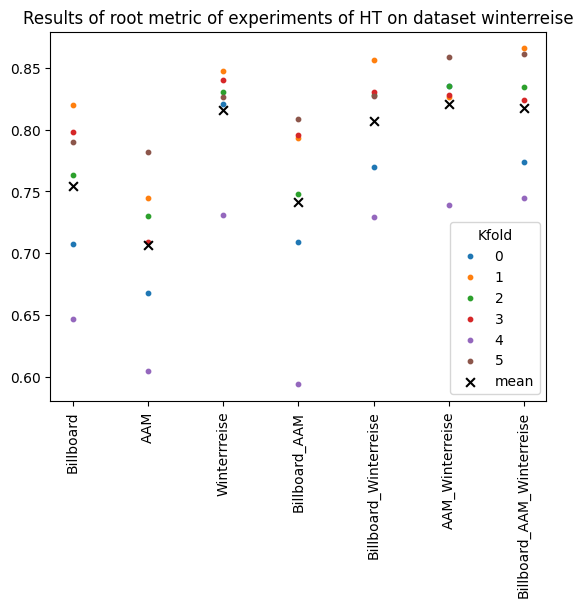

In [91]:
metric_dataset_scatter_plot(results, "HT", "root", "winterreise")

# Boxplot

In [92]:
def metric_dataset_boxplot(results, model, metric, dataset, kfolds=range(6)):

    fig, ax = plt.subplots()
    plt.xticks(rotation=90)

    model_metric_dataset_results = results.loc[results['model'] == model].loc[results['metric'] == metric].loc[results['valid_dataset'] == dataset]
    exp_ids = np.unique(model_metric_dataset_results['exp_id'])
    model_metric_dataset_pivot = model_metric_dataset_results.pivot(columns = ["train_dataset"], index = "kfold", values="value")

    plt.boxplot(model_metric_dataset_pivot)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels = [train_dataset_dict[id] for id in exp_ids]
    ax.set_xticklabels(labels)
    plt.title(f"Results of {metric} metric of experiments of {model} on {dataset} dataset")
    plt.show()

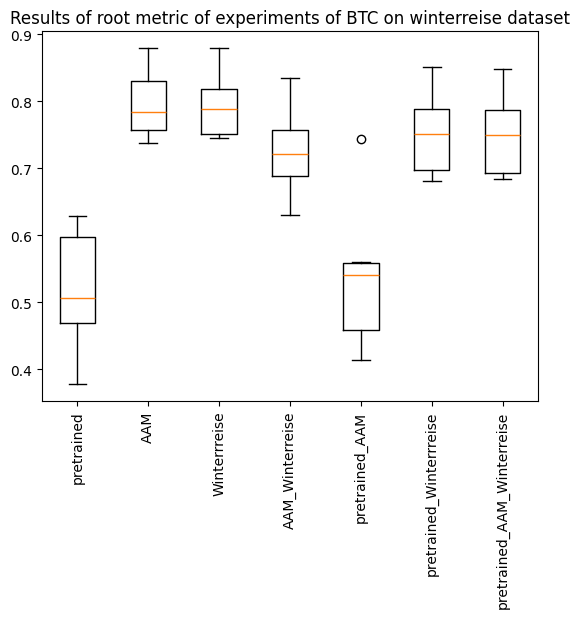

In [93]:
metric_dataset_boxplot(results, "BTC", "root", "winterreise")

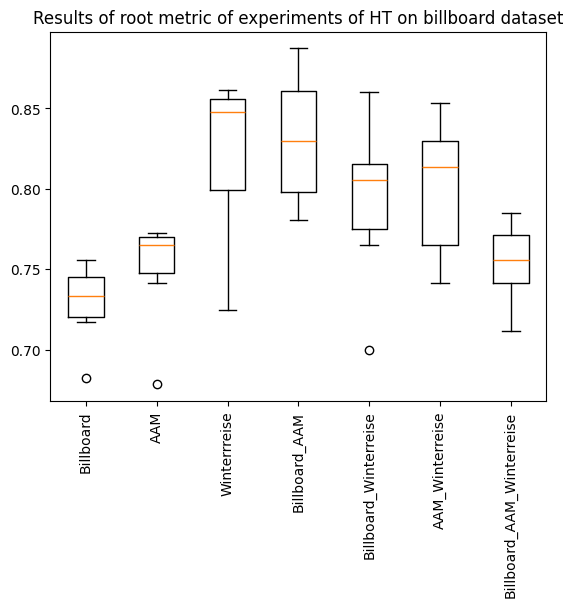

In [182]:
metric_dataset_boxplot(results, "HT", "root", "billboard")

# Grouped boxplot

In [94]:
def dataset_boxplot(results, model, dataset_name):
    dataset_results = results.loc[results['model'] == model].loc[results['valid_dataset'] == dataset_name]
    exp_ids = np.unique(dataset_results['exp_id'])
    plt.figure(figsize=(12, 9))
    ax = sns.boxplot(x='train_dataset',y='value',data=dataset_results, hue='metric', order=[train_dataset_dict[exp_id] for exp_id in exp_ids])
    plt.xticks(rotation=90)
    plt.title(f"Results of experiments on {model} on {dataset_name} dataset")
    plt.xlabel("training dataset")
    plt.show()

## BTC plots

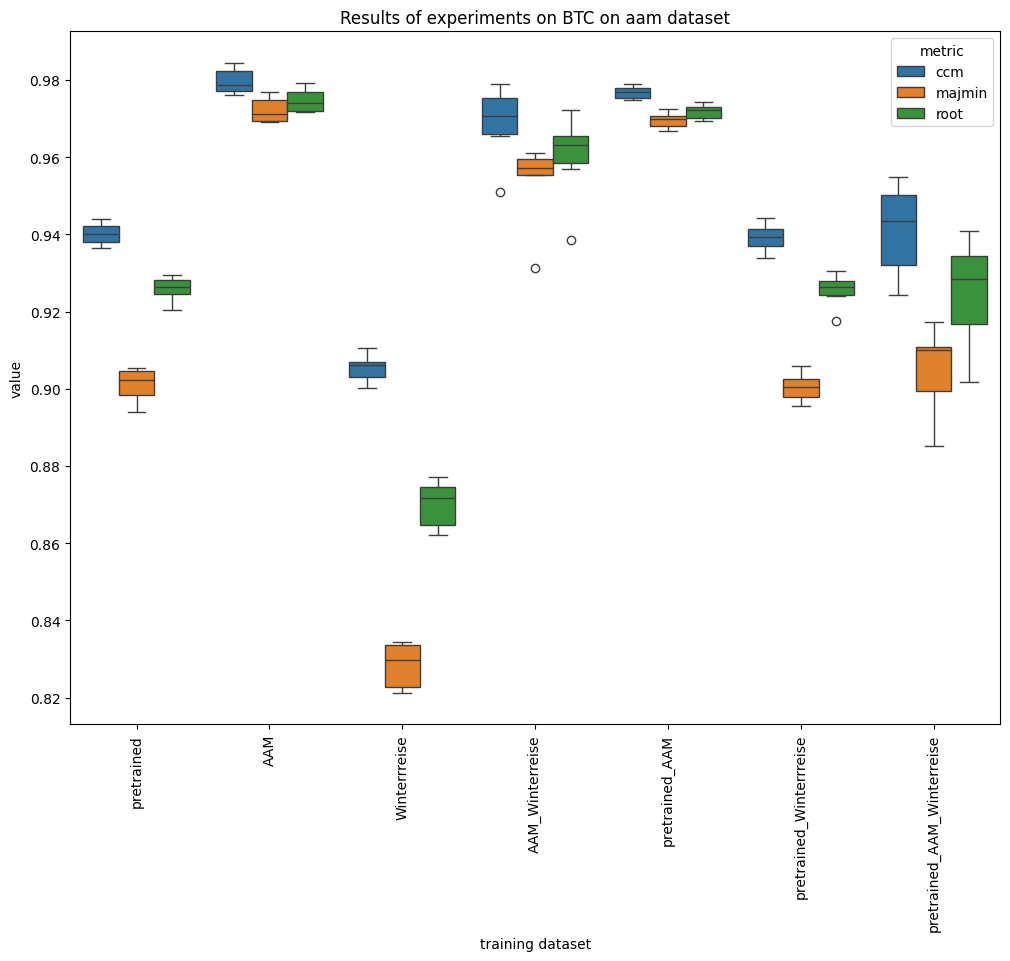

In [97]:
dataset_boxplot(results, "BTC", "aam")

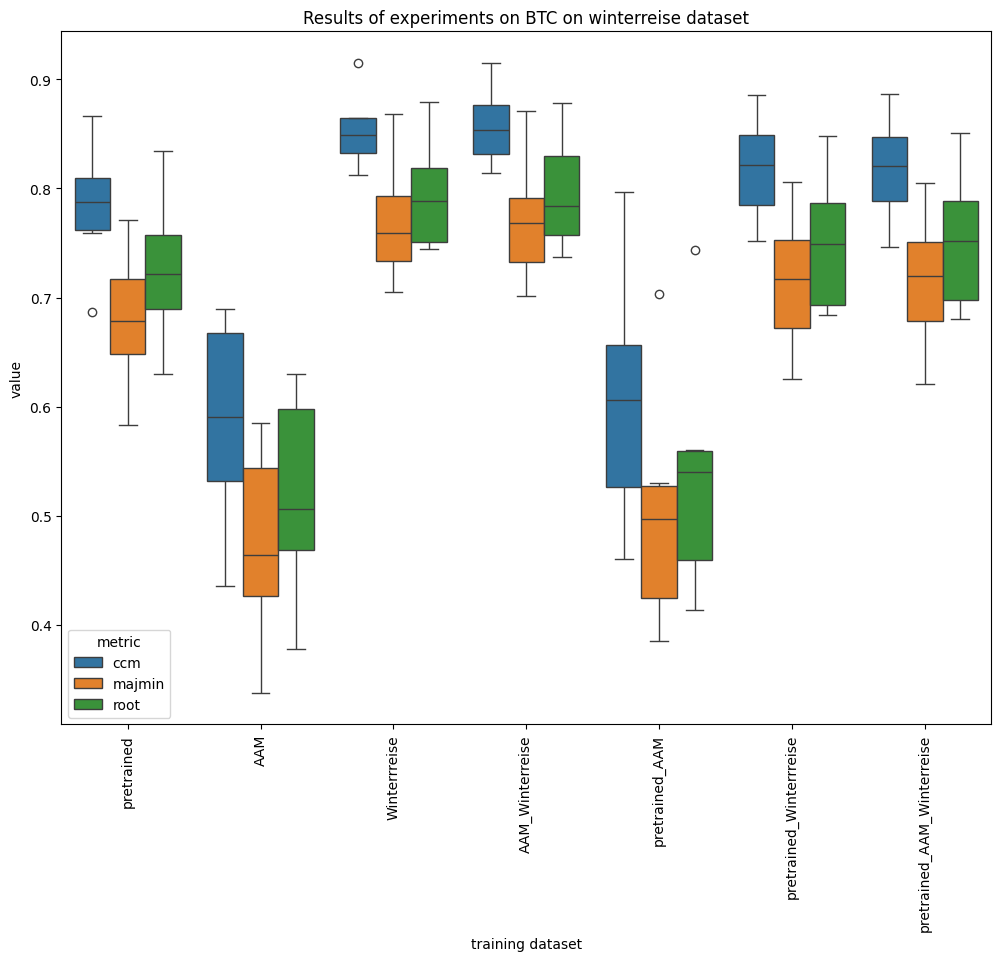

In [98]:
dataset_boxplot(results, "BTC", "winterreise")

## HT plots

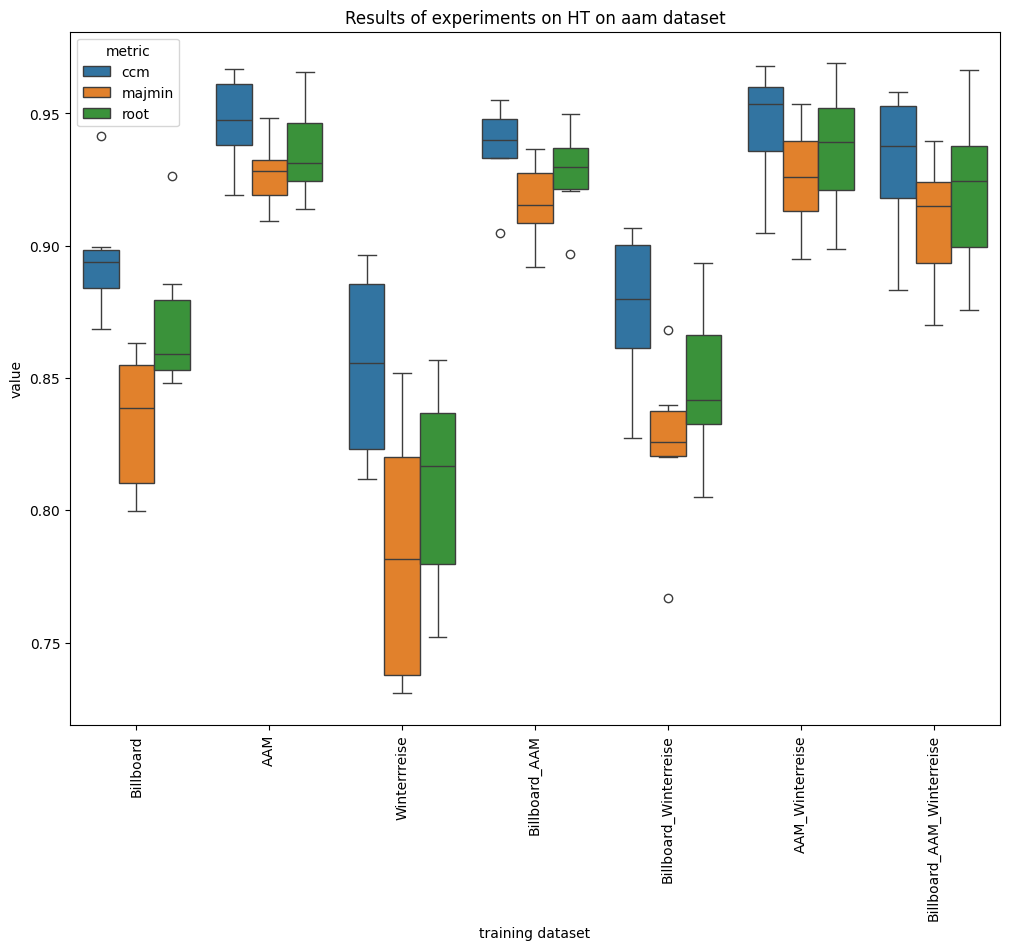

In [99]:
dataset_boxplot(results, "HT", "aam")

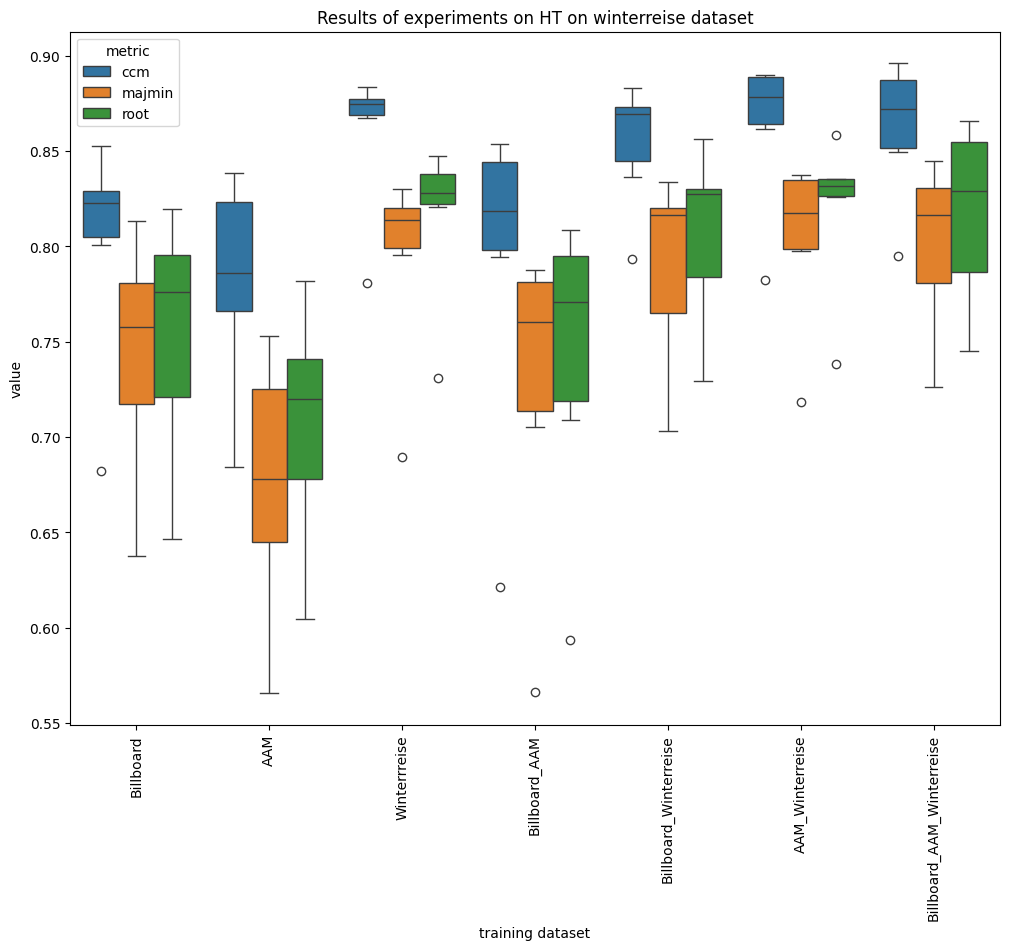

In [100]:
dataset_boxplot(results, "HT", "winterreise")

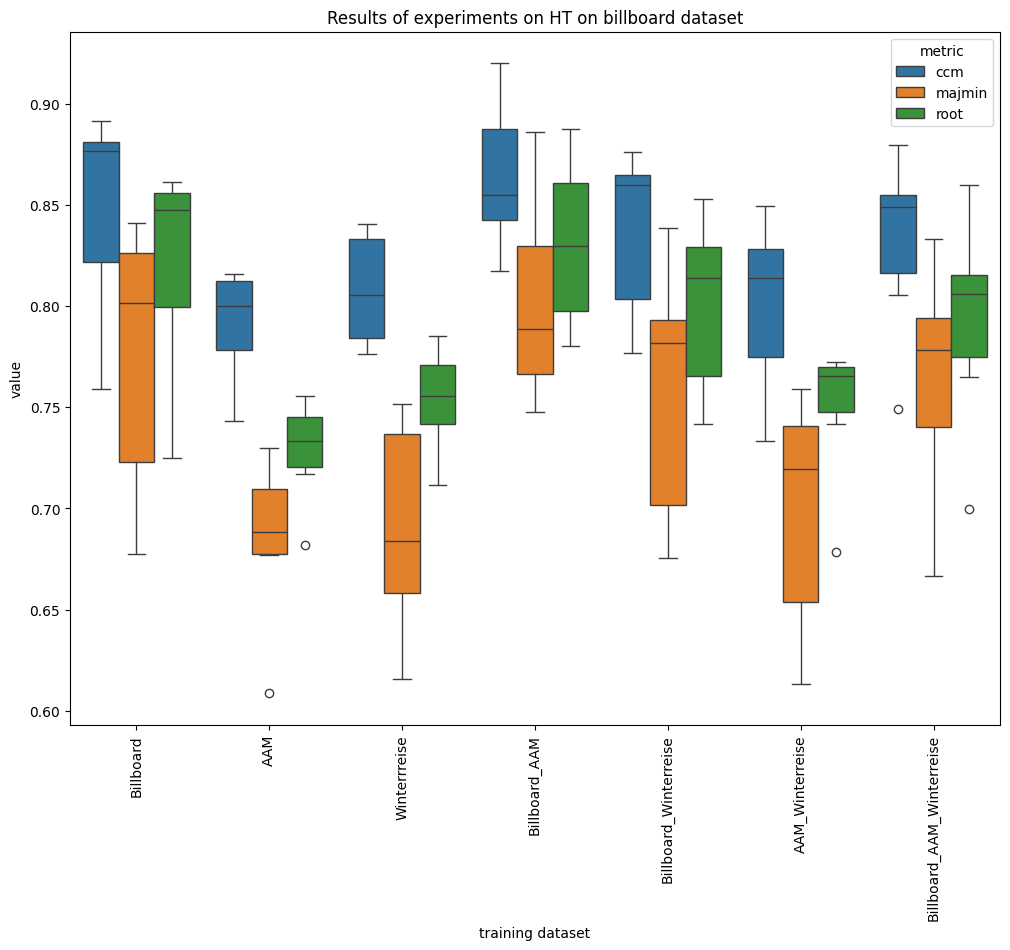

In [101]:
dataset_boxplot(results, "HT", "billboard")

In [191]:
model = "HT"
dataset_name = "billboard"
dataset_results = results.loc[results['model'] == model].loc[results['valid_dataset'] == dataset_name]
dataset_results

,exp_id,model,train_dataset,kfold,valid_dataset,metric,value
0,13,HT,Billboard_AAM_Winterreise,5,billboard,ccm,0.8492
1,13,HT,Billboard_AAM_Winterreise,5,billboard,majmin,0.7639
2,13,HT,Billboard_AAM_Winterreise,5,billboard,root,0.8058
9,13,HT,Billboard_AAM_Winterreise,4,billboard,ccm,0.7491
10,13,HT,Billboard_AAM_Winterreise,4,billboard,majmin,0.6668
...,...,...,...,...,...,...,...
361,7,HT,Billboard,1,billboard,majmin,0.8334
362,7,HT,Billboard,1,billboard,root,0.8518
369,7,HT,Billboard,0,billboard,ccm,0.8912
370,7,HT,Billboard,0,billboard,majmin,0.8410


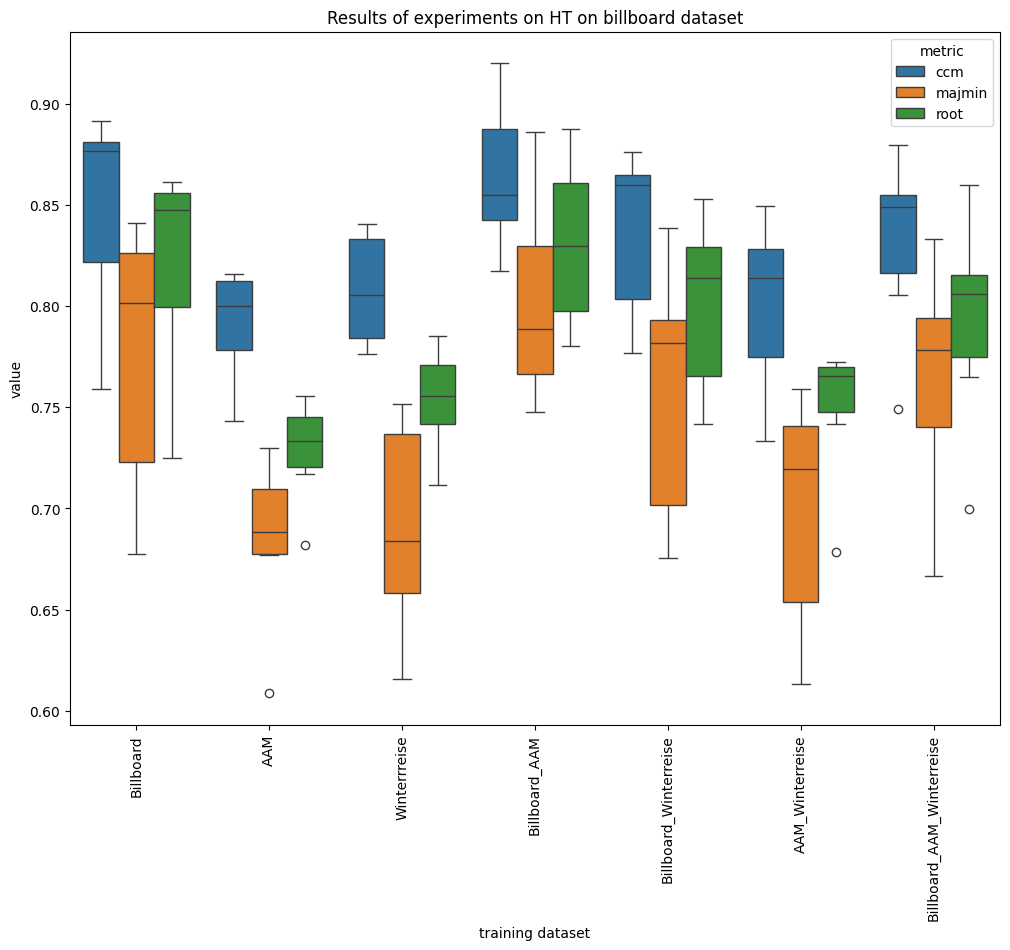

In [192]:
exp_ids = np.unique(dataset_results['exp_id'])
plt.figure(figsize=(12, 9))
ax = sns.boxplot(x='train_dataset',y='value',data=dataset_results, hue='metric', order=[train_dataset_dict[exp_id] for exp_id in exp_ids])
plt.xticks(rotation=90)
plt.title(f"Results of experiments on {model} on {dataset_name} dataset")
plt.xlabel("training dataset")
plt.show()

# Mean and std

### BTC

In [175]:
def mean_and_std_df(results, model):
    results = results[results['model']==model]
    metric_order = ['root', 'majmin', 'ccm']
    if model=="BTC":
        valid_dataset_order= ['aam', 'winterreise']
    elif model=="HT":
        valid_dataset_order = ['aam', 'winterreise', 'billboard']

    results.loc[:, 'valid_dataset'] = pd.Categorical(results['valid_dataset'], categories=valid_dataset_order, ordered=True)
    results.loc[:, 'metric'] = pd.Categorical(results['metric'], categories=metric_order, ordered=True)
    results_pivot = results.sort_values(by = ['valid_dataset', 'metric'], ascending=True).pivot(columns = ['valid_dataset', 'metric'], index = ["exp_id", "kfold"], values="value")
    results_pivot = results_pivot * 100
    results_mean = results_pivot.groupby("exp_id").mean().round(2)
    results_std = results_pivot.groupby("exp_id").std().round(2)

    ordered_columns = pd.MultiIndex.from_product([valid_dataset_order, metric_order])
    results_mean = results_mean.reindex(columns=ordered_columns)
    results_std = results_std.reindex(columns=ordered_columns)
    
    return results_mean, results_std

In [176]:
btc_mean, btc_std = mean_and_std_df(results, "BTC")

In [177]:
btc_mean

aam               winterreise              
         root majmin    ccm        root majmin    ccm
exp_id                                               
0       92.59  90.11  94.01       72.59  67.99  78.29
1       97.47  97.22  97.97       51.74  47.25  58.54
2       87.01  82.84  90.54       79.46  77.02  85.35
3       96.01  95.36  96.88       79.64  77.15  85.74
4       97.18  96.96  97.68       53.92  50.33  60.71
5       92.55  90.04  93.92       75.06  71.47  81.85
6       92.48  90.50  94.12       75.26  71.50  81.77

In [178]:
btc_std

aam              winterreise              
        root majmin   ccm        root majmin    ccm
exp_id                                             
0       0.33   0.46  0.29        7.05   6.61   6.06
1       0.32   0.34  0.35        9.69   9.26   9.88
2       0.63   0.62  0.37        5.26   5.92   3.63
3       1.17   1.12  1.00        5.46   5.99   3.70
4       0.20   0.21  0.17       11.73  11.37  11.99
5       0.45   0.38  0.38        6.58   6.64   4.99
6       1.47   1.20  1.22        6.58   6.58   5.08

In [179]:
ht_mean, ht_std = mean_and_std_df(results, "HT")

In [180]:
ht_mean

aam               winterreise               billboard              
         root majmin    ccm        root majmin    ccm      root majmin    ccm
exp_id                                                                       
7       87.16  83.35  89.64       75.40  74.31  80.18     82.04  77.55  84.83
8       93.59  92.74  94.68       70.64  67.50  78.17     72.83  68.44  79.10
9       80.88  78.38  85.45       81.59  79.40  85.98     75.36  68.99  80.78
10      92.73  91.61  93.69       74.13  72.69  79.28     83.09  80.23  86.39
11      84.77  82.44  87.60       80.69  78.98  85.43     80.10  75.82  83.73
12      93.62  92.55  94.54       82.04  80.39  86.34     74.90  69.84  80.09
13      92.07  90.88  93.09       81.74  80.15  86.21     79.24  76.39  83.15

In [181]:
ht_std

aam              winterreise              billboard             
        root majmin   ccm        root majmin   ccm      root majmin   ccm
exp_id                                                                   
7       3.00   2.74  2.48        6.53   6.28  6.09      5.47   7.01  5.39
8       1.90   1.35  1.83        6.26   6.85  5.65      2.64   4.22  2.84
9       4.10   5.20  3.69        4.27   5.24  3.90      2.63   5.40  2.84
10      1.82   1.61  1.80        8.13   8.50  8.69      4.22   5.23  3.83
11      3.15   3.32  3.06        4.74   5.22  3.38      4.52   6.67  4.39
12      2.56   2.14  2.35        4.17   4.54  4.13      3.63   6.00  4.38
13      3.27   2.58  2.87        4.85   4.47  3.76      5.46   5.83  4.70